**Context**

Can an automated system recommend a funny joke? Jester is an online joke recommender system developed by Ken Goldberg and the team at UC Berkeley. Users are presented jokes through an HTML client interface and allowed to rate jokes. Once a user rates all jokes in the gauge set, the system recommends new jokes to the user.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**THE DATA**

jester_items.csv - jokeid, joke text.

jester_ratings.csv - userId, jokeid, rating

In [2]:
df_jokes = pd.read_csv('/storage/archive/jokes/jester_items.csv')
df_jokes.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [3]:
df_rating = pd.read_csv('/storage/archive/jokes/jester_ratings.csv')
print(df_rating.shape)
df_rating.head()

(1761439, 3)


,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [44]:
# how many users/jokes in ds, the range of ratings
df_rating['userId'].nunique() , df_rating['jokeId'].nunique(), df_rating['rating'].min(), df_rating['rating'].max()

(59132, 140, -10.0, 10.0)

**how many votes each joke has?**

In [45]:
df_rating['jokeId'].value_counts()

7      59122
8      57720
13     56333
15     54932
16     54150
       ...  
73       167
80       167
43       166
51       166
116      166
Name: jokeId, Length: 140, dtype: int64

In [47]:
x = df_rating['jokeId'].value_counts().to_list()
hist_res = np.histogram(x,bins=[0,1000,10000,20000,30000,40000,50000,60000])
hist_res

(array([12, 63, 49,  8,  0,  0,  8]),
 array([    0,  1000, 10000, 20000, 30000, 40000, 50000, 60000]))

Text(0.5, 1.0, 'How many votes do jokes have?')

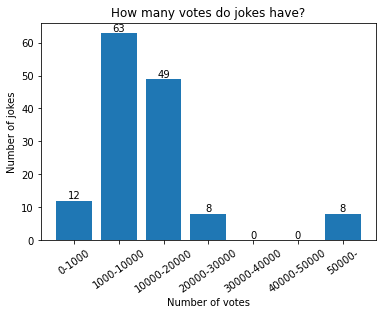

In [49]:
bar = plt.bar(list(range(len(hist_res[0]))),hist_res[0],width=0.8)
plt.xticks(np.arange(7), ['0-1000', '1000-10000', '10000-20000','20000-30000', '30000-40000', '40000-50000','50000-']
          , rotation=35)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.xlabel('Number of votes')
plt.ylabel('Number of jokes')
plt.title('How many votes do jokes have?')

**How many votes each user gave?**

Text(0.5, 1.0, 'How many votes each user gave?')

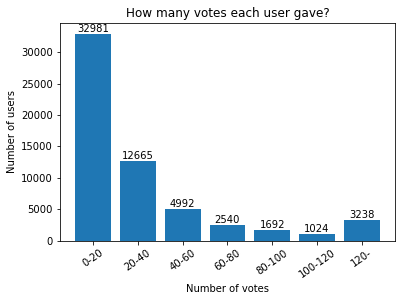

In [50]:
# How many ratings each joke has
x = df_rating['userId'].value_counts().to_list()
hist_res = np.histogram(x,bins=[0,20,40,60,80,100,120,141])
hist_res
bar = plt.bar(list(range(len(hist_res[0]))),hist_res[0],width=0.8)
plt.xticks(np.arange(7), ['0-20', '20-40', '40-60','60-80', '80-100', '100-120','120-']
          , rotation=35)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.xlabel('Number of votes')
plt.ylabel('Number of users')
plt.title('How many votes each user gave?')

**what's the best joke??** 

In [9]:
df_rating.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [10]:
df_group=df_rating.groupby(['jokeId'])['rating'].agg(['mean','median','count','max','min']).sort_values(by='mean',ascending=False)
df_group

,mean,median,count,max,min
jokeId,,,,,
53,3.714381,4.344,23102,10.000,-10.0
105,3.711223,4.250,21822,10.000,-10.0
89,3.606506,4.344,25996,10.000,-10.0
129,3.583496,4.281,19509,10.000,-10.0
35,3.560305,4.188,20524,10.000,-10.0
...,...,...,...,...,...
16,-1.587044,-2.031,54150,10.000,-10.0
5,-1.756331,-2.531,661,9.969,-10.0
7,-1.809230,-2.531,59122,10.000,-10.0


**The best joke has avg rating of 3.714, in addition it get -10 from some user. That means there is not such thing perfect joke.**

In [11]:
indexes = df_group.index.values.tolist()[0:5]
flt = df_jokes['jokeId'].isin(indexes)
df_jokes.loc[flt]

,jokeId,jokeText
34,35,An explorer in the deepest Amazon suddenly fin...
52,53,One Sunday morning William burst into the livi...
88,89,A radio conversation of a US naval \nship with...
104,105,A couple of hunters are out in the woods in th...
128,129,A group of girlfriends is on vacation when the...


In [12]:
d = dict(df_jokes.loc[flt].values)
d[35].replace("\n", " ")

'An explorer in the deepest Amazon suddenly finds himself surrounded by a bloodthirsty group of natives. Upon surveying the situation, he says quietly to himself, "Oh God, I\'m screwed."   The sky darkens and a voice booms out, "No, you are NOT screwed. Pick up that stone at your feet and bash in the head of the chief standing in front of you."   So with the stone he bashes the life out of the chief. Standing above the lifeless body, breathing heavily looking at 100 angry natives...   The voice booms out again, "Okay ..... NOW you\'re screwed."  '

**what is better long or short jokes?**

In [18]:
df = df_group.copy()
df = df.reset_index()
df

,jokeId,mean,median,count,max,min
0,53,3.714381,4.344,23102,10.000,-10.0
1,105,3.711223,4.250,21822,10.000,-10.0
2,89,3.606506,4.344,25996,10.000,-10.0
3,129,3.583496,4.281,19509,10.000,-10.0
4,35,3.560305,4.188,20524,10.000,-10.0
...,...,...,...,...,...,...
135,16,-1.587044,-2.031,54150,10.000,-10.0
136,5,-1.756331,-2.531,661,9.969,-10.0
137,7,-1.809230,-2.531,59122,10.000,-10.0
138,124,-2.163482,-3.406,4234,10.000,-10.0


In [21]:
df = df.merge(df_jokes)
df['length'] = df['jokeText'].apply(len)
df

,jokeId,mean,median,count,max,min,jokeText,length
0,53,3.714381,4.344,23102,10.000,-10.0,One Sunday morning William burst into the livi...,1217
1,105,3.711223,4.250,21822,10.000,-10.0,A couple of hunters are out in the woods in th...,510
2,89,3.606506,4.344,25996,10.000,-10.0,A radio conversation of a US naval \nship with...,795
3,129,3.583496,4.281,19509,10.000,-10.0,A group of girlfriends is on vacation when the...,1325
4,35,3.560305,4.188,20524,10.000,-10.0,An explorer in the deepest Amazon suddenly fin...,549
...,...,...,...,...,...,...,...,...
135,16,-1.587044,-2.031,54150,10.000,-10.0,Q. What is orange and sounds like a parrot? \...,60
136,5,-1.756331,-2.531,661,9.969,-10.0,Q.\tWhat's O. J. Simpson's Internet address? \...,95
137,7,-1.809230,-2.531,59122,10.000,-10.0,How many feminists does it take to screw in a ...,76
138,124,-2.163482,-3.406,4234,10.000,-10.0,"Person 1: Hey, wanna hear a great knock-knock ...",181


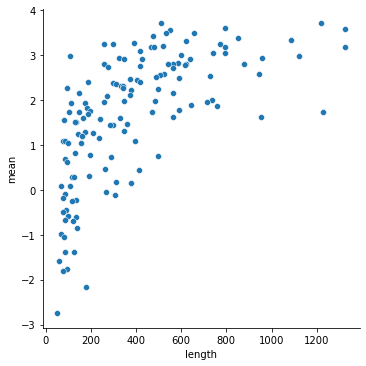

In [26]:
sns.relplot(kind='scatter',data=df,x='length',y='mean')

**Long joke is better!**

**Does queation jokes, are better?**

In [33]:
df['type'] = np.where(df['jokeText'].str.contains('Q'), 'Question', 'Story')
df

,jokeId,mean,median,count,max,min,jokeText,length,type
0,53,3.714381,4.344,23102,10.000,-10.0,One Sunday morning William burst into the livi...,1217,Story
1,105,3.711223,4.250,21822,10.000,-10.0,A couple of hunters are out in the woods in th...,510,Story
2,89,3.606506,4.344,25996,10.000,-10.0,A radio conversation of a US naval \nship with...,795,Story
3,129,3.583496,4.281,19509,10.000,-10.0,A group of girlfriends is on vacation when the...,1325,Story
4,35,3.560305,4.188,20524,10.000,-10.0,An explorer in the deepest Amazon suddenly fin...,549,Story
...,...,...,...,...,...,...,...,...,...
135,16,-1.587044,-2.031,54150,10.000,-10.0,Q. What is orange and sounds like a parrot? \...,60,Question
136,5,-1.756331,-2.531,661,9.969,-10.0,Q.\tWhat's O. J. Simpson's Internet address? \...,95,Question
137,7,-1.809230,-2.531,59122,10.000,-10.0,How many feminists does it take to screw in a ...,76,Story
138,124,-2.163482,-3.406,4234,10.000,-10.0,"Person 1: Hey, wanna hear a great knock-knock ...",181,Story


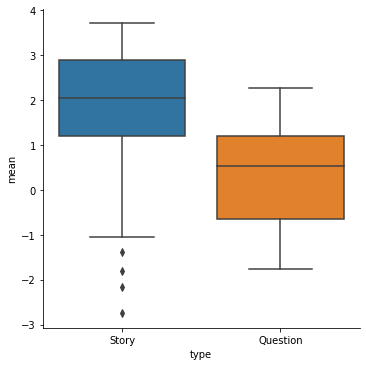

In [38]:
sns.catplot(x='type',y='mean',data=df, kind='box')

**It seems that in order to be funny, it is better not to start with the question ...**